In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('housing.csv')

data = dataset.select_dtypes(include = ['int64','float64'])
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
data.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
x = data.drop('SalePrice',axis=1)
print(x.shape)

y = data['SalePrice']
print(y.shape)

(1121, 37)
(1121,)


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
x_train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1.000000,-0.010473,0.004003,-0.038939,-0.062433,0.007414,-0.014702,-0.004560,-0.081030,-0.004901,...,-0.023604,-0.035684,0.005165,-0.018757,-0.062133,0.037427,0.041680,0.057989,-0.006902,0.019533
MSSubClass,-0.010473,1.000000,-0.375797,-0.187244,0.052832,-0.112310,0.045731,0.026166,0.055060,-0.064882,...,-0.088281,0.015498,-0.019723,-0.027048,-0.025529,-0.014628,-0.002250,-0.026355,-0.005245,0.020889
LotFrontage,0.004003,-0.375797,1.000000,0.427653,0.262739,-0.034860,0.123829,0.100055,0.200594,0.272077,...,0.368250,0.090758,0.168207,0.006763,0.068190,0.047810,0.256816,0.002361,0.003775,0.005728
LotArea,-0.038939,-0.187244,0.427653,1.000000,0.168105,-0.032775,0.035309,0.031906,0.092476,0.229815,...,0.203561,0.115446,0.099444,-0.029542,0.012465,0.053912,0.124847,0.006341,-0.000385,-0.013043
OverallQual,-0.062433,0.052832,0.262739,0.168105,1.000000,-0.155624,0.611800,0.582268,0.440603,0.273892,...,0.549098,0.280724,0.350655,-0.159026,0.032692,0.049553,0.101585,-0.050157,0.053911,-0.006546
OverallCond,0.007414,-0.112310,-0.034860,-0.032775,-0.155624,1.000000,-0.387871,0.080111,-0.156584,-0.039993,...,-0.208693,-0.020249,-0.065916,0.061827,-0.018779,0.094902,-0.035499,0.122992,-0.014182,0.039376
YearBuilt,-0.014702,0.045731,0.123829,0.035309,0.611800,-0.387871,1.000000,0.625638,0.346648,0.236328,...,0.473095,0.246721,0.235666,-0.399917,0.053101,-0.077395,0.007782,-0.102200,0.013816,0.014459
YearRemodAdd,-0.004560,0.026166,0.100055,0.031906,0.582268,0.080111,0.625638,1.000000,0.208602,0.127365,...,0.391338,0.242419,0.250444,-0.199454,0.045582,-0.035958,0.032656,-0.043001,0.020674,0.032060
MasVnrArea,-0.081030,0.055060,0.200594,0.092476,0.440603,-0.156584,0.346648,0.208602,1.000000,0.287480,...,0.386360,0.172568,0.141713,-0.105469,0.019005,0.048633,0.038056,-0.054656,0.015670,-0.020770
BsmtFinSF1,-0.004901,-0.064882,0.272077,0.229815,0.273892,-0.039993,0.236328,0.127365,0.287480,1.000000,...,0.298938,0.216345,0.137184,-0.105668,0.026744,0.076596,0.234982,-0.001103,0.009203,0.022910


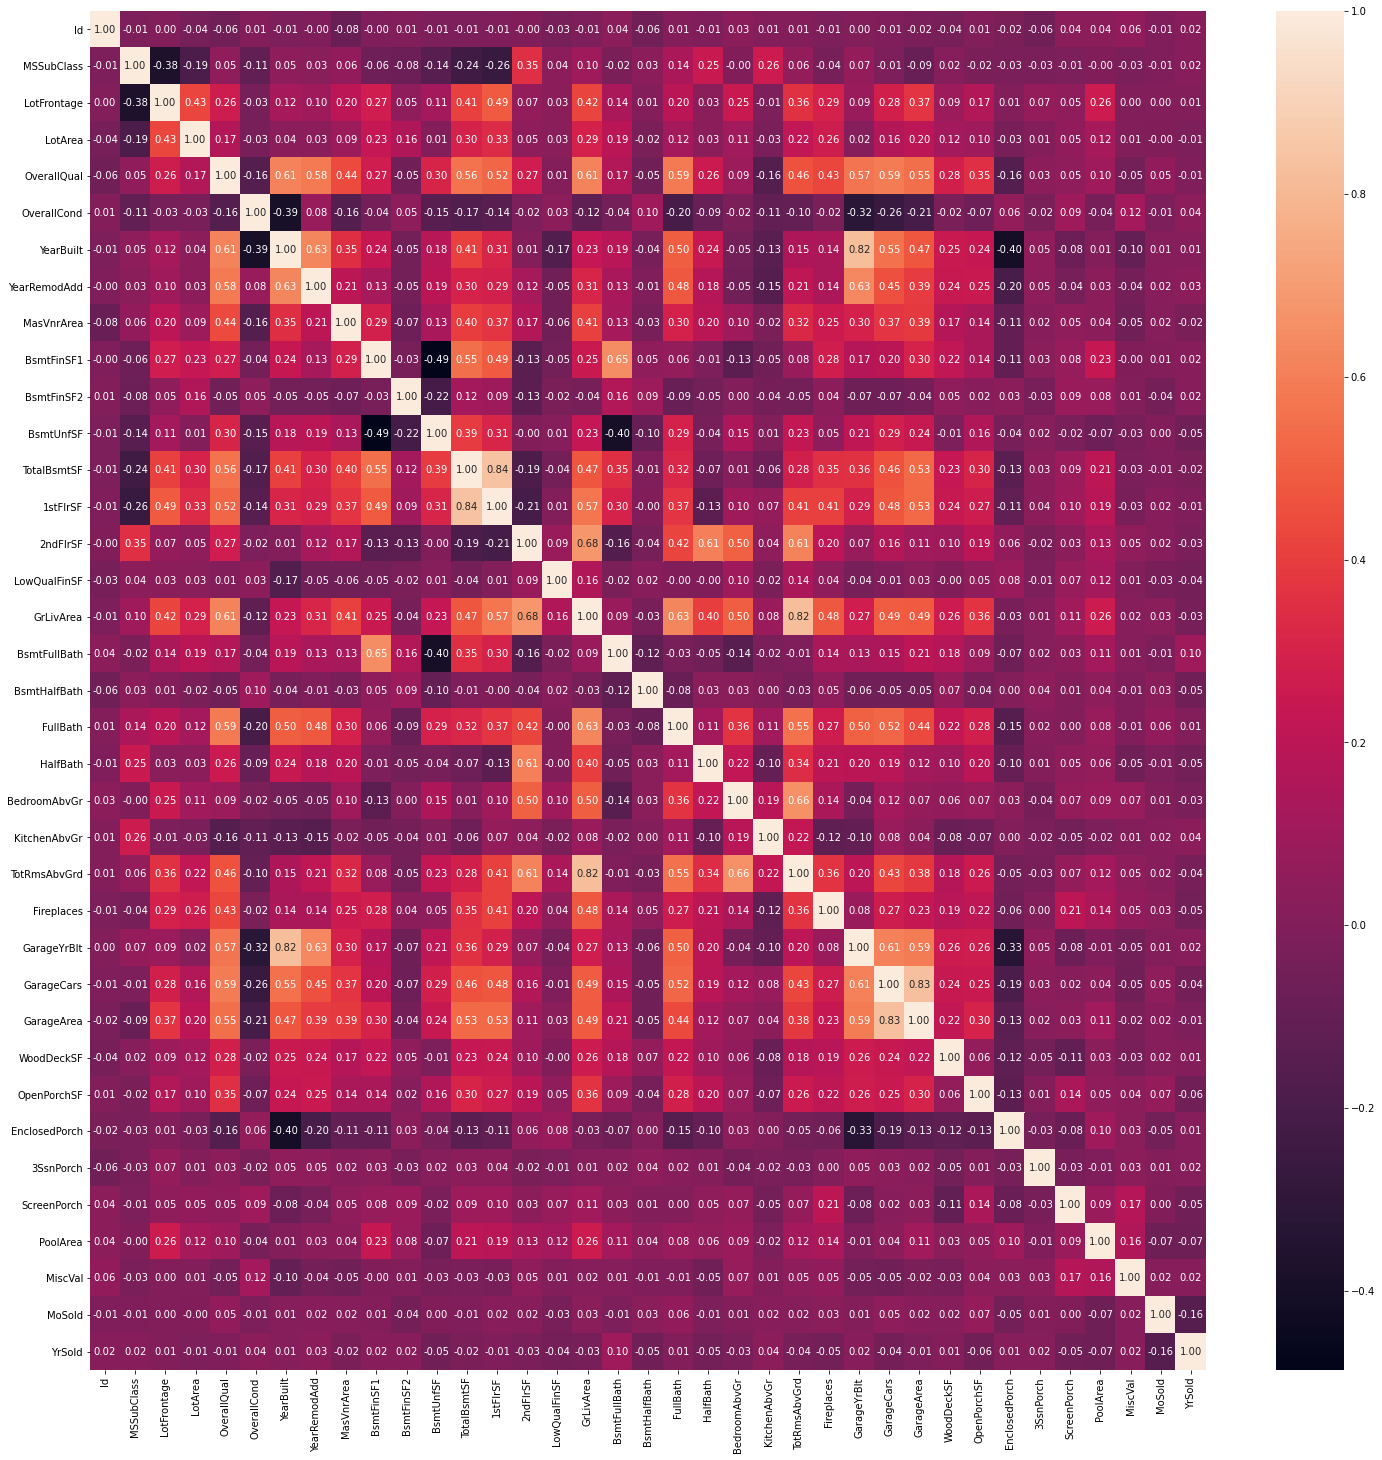

In [10]:
plt.figure(figsize=(25,25))
sns.heatmap(x_train.corr(),annot=True,fmt='0.2f')
plt.show()

In [11]:
data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.797881
GrLivArea        0.705154
GarageCars       0.647034
GarageArea       0.619330
TotalBsmtSF      0.615612
1stFlrSF         0.607969
FullBath         0.566627
TotRmsAbvGrd     0.547067
YearBuilt        0.525394
YearRemodAdd     0.521253
GarageYrBlt      0.504753
MasVnrArea       0.488658
Fireplaces       0.461873
BsmtFinSF1       0.390301
LotFrontage      0.344270
OpenPorchSF      0.343354
WoodDeckSF       0.336855
2ndFlrSF         0.306879
LotArea          0.299962
HalfBath         0.268560
BsmtFullBath     0.236737
BsmtUnfSF        0.213129
BedroomAbvGr     0.166814
ScreenPorch      0.110427
PoolArea         0.092488
MoSold           0.051568
3SsnPorch        0.030777
LowQualFinSF    -0.001482
YrSold          -0.011869
BsmtFinSF2      -0.028021
MiscVal         -0.036041
BsmtHalfBath    -0.036513
Id              -0.047122
MSSubClass      -0.088032
OverallCond     -0.124391
KitchenAbvGr    -0.140497
EnclosedPorch   -0.154843
Name: SalePr

In [12]:
def Corelation(dataset,threshold):
    col_corr = set()
    corr_matx = dataset.corr()
    for i in range(len(corr_matx.columns)):
        for j in range(i):
            if abs(corr_matx.iloc[i,j]) > threshold:
                colname = corr_matx.columns[i]
                col_corr.add(colname)
    return col_corr

In [13]:
corr_feature = Corelation(data,0.80)
corr_feature

{'1stFlrSF', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'}

In [14]:
x_train = x_train.drop(corr_feature,axis=1)
x_test = x_test.drop(corr_feature,axis=1)